In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
data = pd.read_csv("uber.csv")
df = pd.DataFrame(data, columns = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])

In [22]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,7.5,-73.999817,40.738354,-73.999512,40.723217
1,7.7,-73.994355,40.728225,-73.994710,40.750325
2,12.9,-74.005043,40.740770,-73.962565,40.772647
3,5.3,-73.976124,40.790844,-73.965316,40.803349
4,16.0,-73.925023,40.744085,-73.973082,40.761247


In [23]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
dtype: int64

In [24]:
df.dropna(inplace = True)

In [25]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
dtype: int64

In [26]:
from math import sin, cos, radians, atan2, sqrt
def haversine(lat1, lon1, lat2, lon2):
    r = 6371.0
    lat1, lon1, lat2, lon2 = map(radians, [lat1,lon1,lat2,lon2])
    dlon = lon2-lon1
    dlat = lat2-lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2*atan2(sqrt(a), sqrt(1-a))
    distance = r*c
    return distance

In [27]:
df['Distance'] = df.apply(lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

{'whiskers': [<matplotlib.lines.Line2D at 0x26283cfdfd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2628b96f990>,
 'boxes': [<matplotlib.lines.Line2D at 0x26283c46dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2628b95ca50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2628b95d210>],
 'means': []}

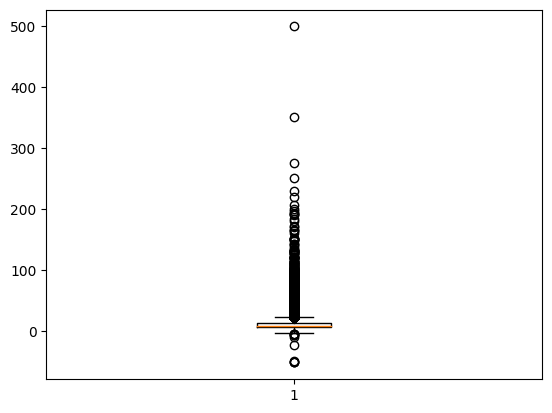

In [28]:
plt.boxplot(df['fare_amount'])

In [29]:
upperLimit = df['fare_amount'].quantile(0.95)
df = df[df['fare_amount'] <= upperLimit]
lowerLimit = df['fare_amount'].quantile(0.05)
df = df[df['fare_amount'] >= lowerLimit]
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,4.475450
...,...,...,...,...,...,...
199993,9.5,-73.987798,40.721210,-73.980960,40.744388,2.640893
199994,12.0,-73.983070,40.760770,-73.972972,40.754177,1.122878
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1.875050
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,3.539715


{'whiskers': [<matplotlib.lines.Line2D at 0x2628b907e10>,
 'caps': [<matplotlib.lines.Line2D at 0x2628b8f52d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2628b907490>],
 'medians': [<matplotlib.lines.Line2D at 0x2628b8f6350>],
 'fliers': [<matplotlib.lines.Line2D at 0x262f6bf3a10>],
 'means': []}

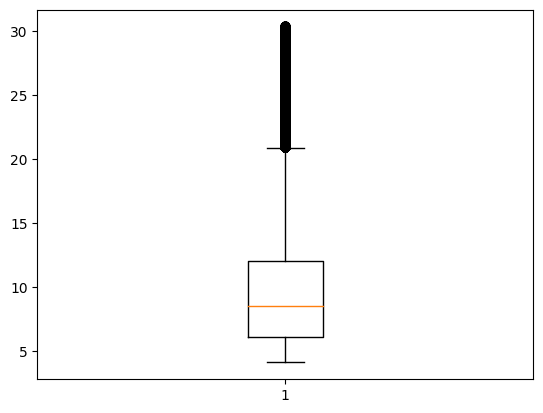

In [30]:
plt.boxplot(df['fare_amount'])

In [31]:
df = df.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis=1)

In [32]:
df

,fare_amount,Distance
0,7.5,1.683323
1,7.7,2.457590
2,12.9,5.036377
3,5.3,1.661683
4,16.0,4.475450
...,...,...
199993,9.5,2.640893
199994,12.0,1.122878
199996,7.5,1.875050
199998,14.5,3.539715


In [33]:
x = df.drop('fare_amount', axis=1)
y = df['fare_amount']

In [36]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [39]:
from sklearn.linear_model import LinearRegression
linearModel = LinearRegression()
linearModel.fit(xTrain, yTrain)

C:\Users\manjo\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\manjo\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\manjo\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\manjo\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed

LinearRegression()

In [40]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor()
rfModel.fit(xTrain, yTrain)

C:\Users\manjo\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\manjo\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\manjo\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\manjo\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed

RandomForestRegressor()

In [43]:
from sklearn.metrics import r2_score, mean_squared_error
linear_pred = linearModel.predict(xTest)
linear_r2 = r2_score(yTest, linear_pred)
linear_rmse = np.sqrt(mean_squared_error(yTest, linear_pred))

C:\Users\manjo\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\manjo\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\manjo\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\manjo\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed

In [44]:
rf_pred = rfModel.predict(xTest)
rf_r2 = r2_score(yTest, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(yTest, rf_pred))

C:\Users\manjo\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\manjo\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\manjo\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\manjo\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed

In [45]:
print("Linear Regression R2 Score:", linear_r2)
print("Linear Regression RMSE:", linear_rmse)

print("Random Forest Regression R2 Score:", rf_r2)
print("Random Forest Regression RMSE:", rf_rmse)

Linear Regression R2 Score: 0.0003556586479391832
Linear Regression RMSE: 5.136218252611839
Random Forest Regression R2 Score: 0.5928323276985876
Random Forest Regression RMSE: 3.2779879934467577
